In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

Text(0, 0.5, 'Mean Earth Temperature')

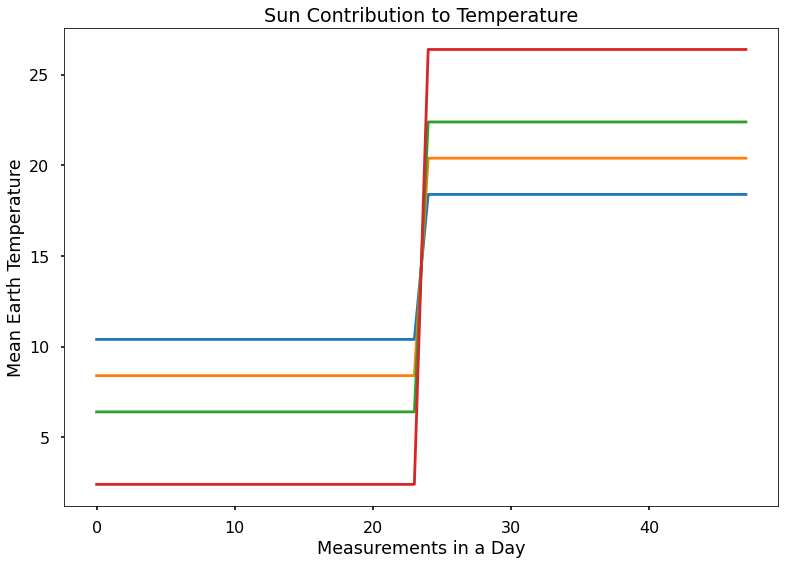

In [3]:
sun_cycle = 24 #duration in hours
num_days = 4 #how many day did HeatSPro measure?
measurement_rate = 2 #number of measurements per hour

temp_change_each_day = [4, 6, 8, 12];
# total number of measurements
num_measurements = sun_cycle * measurement_rate 
mean_earth_temp = 14.4 # in °C

# Make a super-simplue simulation of the measurements 
# across all days at the rate per day given by HeatSPro

# First we make a vector of mean earth temperature
t = mean_earth_temp+np.zeros((num_measurements, num_days))

# Now let's decrease the temperature during the night and increase it during the day
# We assume the night to be at the beginnig of the measurements
night_temp = np.zeros((num_days,1))
day_temp = np.zeros((num_days,1))

night_temp[0] = mean_earth_temp-temp_change_each_day[0]
day_temp[0] = mean_earth_temp+temp_change_each_day[0]

night_temp[1] = mean_earth_temp-temp_change_each_day[1] 
day_temp[1] = mean_earth_temp+temp_change_each_day[1] 

night_temp[2] = mean_earth_temp-temp_change_each_day[2] 
day_temp[2] = mean_earth_temp+temp_change_each_day[2] 

night_temp[3] = mean_earth_temp-temp_change_each_day[3] 
day_temp[3] = mean_earth_temp+temp_change_each_day[3] 

t[0:24,:1] = night_temp[0]*np.ones((24, 1))
t[24:48,:1] = day_temp[0]*np.ones((24, 1))

t[0:24,1:2] = night_temp[1]*np.ones((24, 1))
t[24:48,1:2] = day_temp[1]*np.ones((24, 1))

t[0:24,2:3] = night_temp[2]*np.ones((24, 1))
t[24:48,2:3] = day_temp[2]*np.ones((24, 1))

t[0:24,3:4] = night_temp[3]*np.ones((24, 1))
t[24:48,3:4] = day_temp[3]*np.ones((24, 1))

# Let's plot what we just simulated
# This is an extremely simple model.
# Only two temperatures, night and day, 
# No transitions in temperature
plt.plot(t)
plt.title('Sun Contribution to Temperature')
plt.xlabel('Measurements in a Day')
plt.ylabel('Mean Earth Temperature')

Text(0, 0.5, 'Measurement Noise')

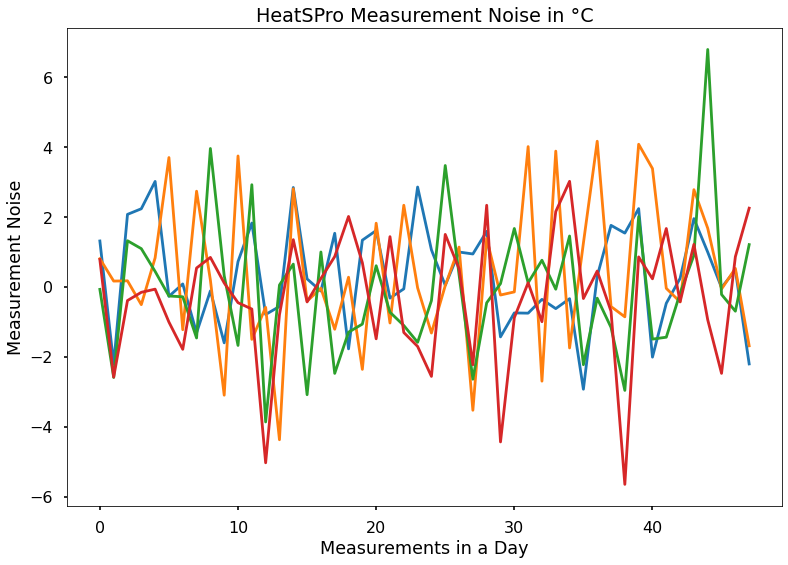

In [4]:
# We now want to simulate the noisy measurements that HeatSPro 
noise_amplitude = 2 #how much the noise disrupts the measure
measurement_noise = noise_amplitude*np.random.randn(*t.shape)

plt.plot(measurement_noise)
plt.title('HeatSPro Measurement Noise in °C')
plt.xlabel('Measurements in a Day')
plt.ylabel('Measurement Noise')

Text(0, 0.5, 'Temperature in °C')

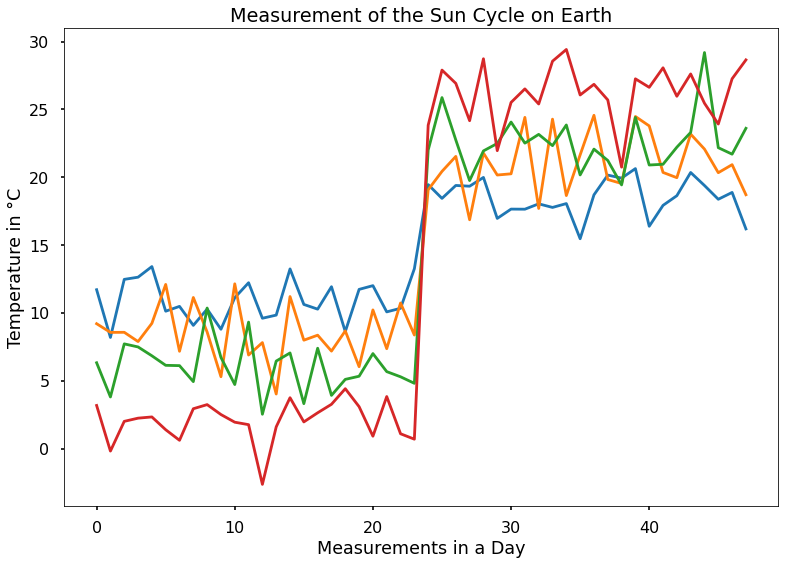

In [5]:
# put the two together to make a simulated measurement of the earth 
# temperature over 4 days as seen by HeatSPro and ADAS`

# To do so, we will add the noise to the signal
measurements = measurement_noise + t 

plt.plot(measurements)
plt.title('Measurement of the Sun Cycle on Earth')
plt.xlabel('Measurements in a Day')
plt.ylabel('Temperature in °C')

Text(0, 0.5, 'Temperature in °C')

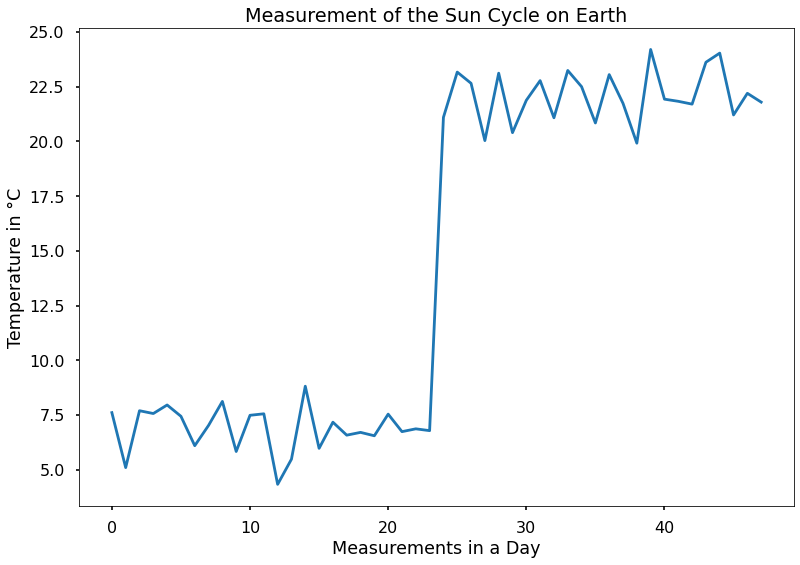

In [7]:
# ADAS knows the noise is additive and independent in the measurements. So, to reduce 
# the influence of noise ADAS decides to average across the 4 days.
average_means = np.mean(measurements, axis=1) # here we use Numpy's mean function on the second dimension axis=1

plt.plot(average_means)
plt.title('Measurement of the Sun Cycle on Earth')
plt.xlabel('Measurements in a Day')
plt.ylabel('Temperature in °C')

In [8]:
average_means.shape

(48,)

In [13]:
# To fix this issue we can use the numpy method "newaxis" 
# This adds a new dimension (axis) to our tupple to make
# it a proper array.

#average_means = average_means[:,np.newaxis]
#average_means.shape

# Another way to do this is with the numpy array method "reshape"
average_means = average_means.reshape(-1,1)
average_means.shape

(48, 1)

Text(0, 0.5, 'Temperature in °C')

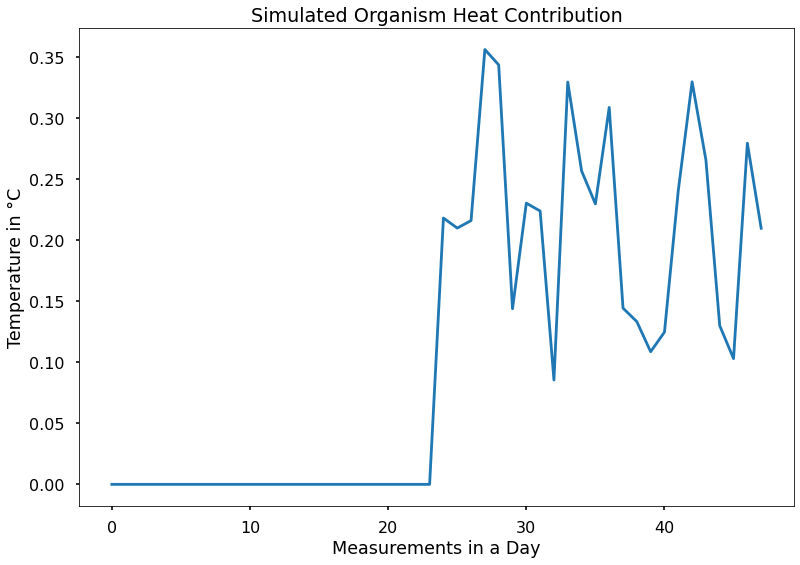

In [14]:
organism_mean_heat = 0.2
organism_std_heat = 0.1

organism_activity_heat = organism_mean_heat + organism_std_heat*np.random.randn(24,1)

# Finally we build a vector of the heat contributed by this organism to the whole day of measurements
organism_daily_heat = np.vstack((np.zeros(organism_activity_heat.shape),organism_activity_heat))

plt.plot(organism_daily_heat)
plt.title('Simulated Organism Heat Contribution')
plt.xlabel('Measurements in a Day')
plt.ylabel('Temperature in °C')

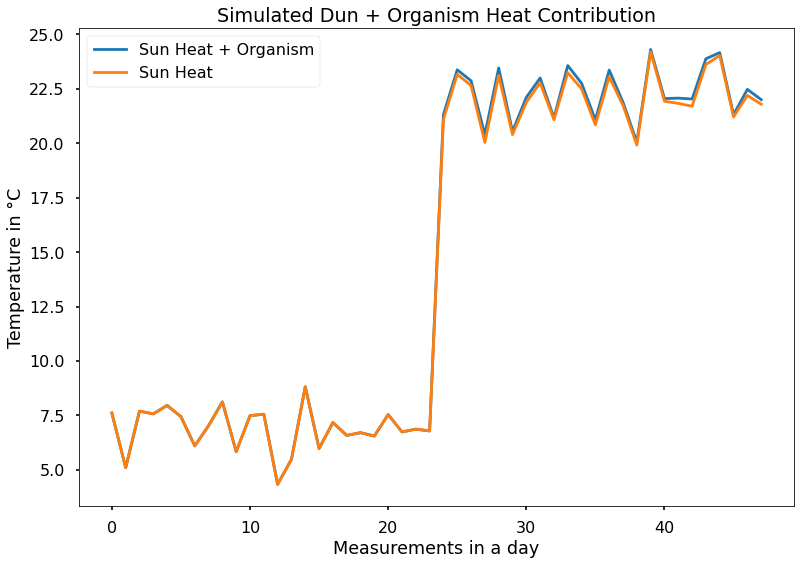

In [17]:
# Here ADAS sums the two arrays
sun_plus_organisms = average_means + organism_daily_heat

plt.plot(sun_plus_organisms, label = "Sun Heat + Organism")
plt.plot(average_means, label = "Sun Heat")
plt.title('Simulated Dun + Organism Heat Contribution')
plt.xlabel('Measurements in a day')
plt.ylabel('Temperature in °C')
plt.legend()

Text(0, 0.5, 'Temperature in °C')

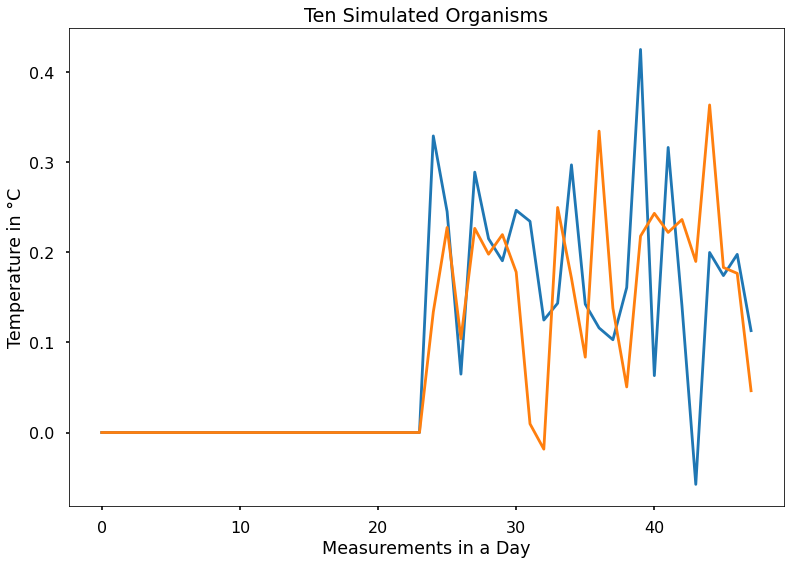

In [34]:
# The assumptions for the each organism will not change
# organism_mean_heat = 0.2
# organism_std_heat  = 0.1

# But now, ADAS needs to build 2 simulated organisms, each organisms will have the same mean 
# heat contribution but a tiny variation on top of it due to 'organism_std_heat' and the 
# fact that we are adding noise:
organism1_activity_heat = organism_mean_heat + organism_std_heat*np.random.randn(24,1)
organism2_activity_heat = organism_mean_heat + organism_std_heat*np.random.randn(24,1)

# Finally ADAS builds a vector of the heat contributed by each organism to the whole day of measurements,
# one organisms at the time. So, ADAS gets ten different lines now.
#
# ADAS added only during the day, not the night, so the contributions must be added below only to the second part
# of the measurements (the last 24 measurements), the first measurements (0:23) are filled with Zeros 
organism1_daily_heat = np.vstack(( np.zeros(organism1_activity_heat.shape),  organism1_activity_heat) )
organism2_daily_heat = np.vstack(( np.zeros(organism2_activity_heat.shape),  organism2_activity_heat) )

# ADAS plots the data, one organism at the time, using different colors.
plt.plot(organism1_daily_heat)
plt.plot(organism2_daily_heat)
plt.title('Ten Simulated Organisms')
plt.xlabel('Measurements in a Day')
plt.ylabel('Temperature in °C')

In [36]:
# numpy hstack to group all the organisms in a (48, 10) array and then compute the sum across the second dimension 
organisms_group = np.hstack( (organism1_daily_heat, organism2_daily_heat) )

organisms_group.shape

(48, 2)

In [41]:
# numpy sum can be used over the second dimension (axis=1) to sum across the two organisms
organisms_sum = np.sum(organisms_group, axis=1)

# as it happened before the output will be a (48,) tuple. This is incompatible with the other 
# vectors (i.e., `average_meas`), so reshape can be to fix the shape
organisms_sum = organisms_sum.reshape(-1,1)
organisms_sum.shape

(48, 1)

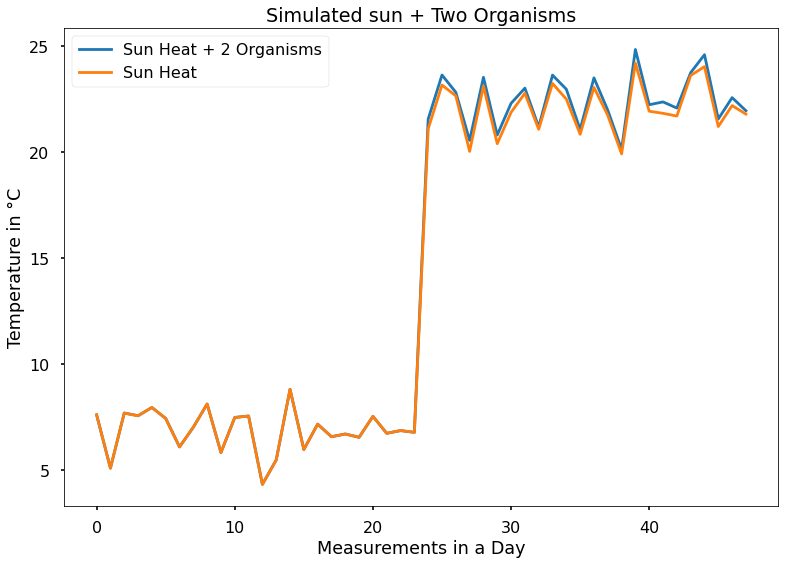

In [42]:
sun_plus_organisms = average_means + organisms_sum

plt.plot(sun_plus_organisms, label = "Sun Heat + 2 Organisms")
plt.plot(average_means, label = "Sun Heat")
plt.title('Simulated sun + Two Organisms')
plt.xlabel('Measurements in a Day')
plt.ylabel('Temperature in °C')
plt.legend()

Text(0, 0.5, 'Temperature in °C')

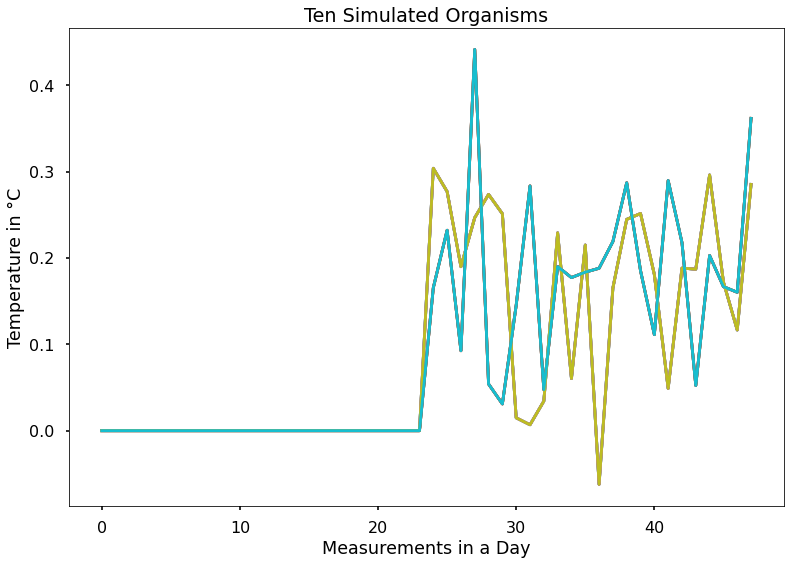

In [33]:
# The assumptions for the each organism will not change
# organism_mean_heat = 0.2
# organism_std_heat  = 0.1

# But now, ADAS needs to build 2 simulated organisms, each organisms will have the same mean 
# heat contribution but a tiny variation on top of it due to 'organism_std_heat' and the 
# fact that we are adding noise:
organism1_activity_heat = organism_mean_heat + organism_std_heat*np.random.randn(24,1)
organism2_activity_heat = organism_mean_heat + organism_std_heat*np.random.randn(24,1)
organism3_activity_heat = organism_mean_heat + organism_std_heat*np.random.randn(24,1)
organism4_activity_heat = organism_mean_heat + organism_std_heat*np.random.randn(24,1)
organism5_activity_heat = organism_mean_heat + organism_std_heat*np.random.randn(24,1)
organism6_activity_heat = organism_mean_heat + organism_std_heat*np.random.randn(24,1)
organism7_activity_heat = organism_mean_heat + organism_std_heat*np.random.randn(24,1)
organism8_activity_heat = organism_mean_heat + organism_std_heat*np.random.randn(24,1)
organism9_activity_heat = organism_mean_heat + organism_std_heat*np.random.randn(24,1)
organism10_activity_heat = organism_mean_heat + organism_std_heat*np.random.randn(24,1)

# Finally ADAS builds a vector of the heat contributed by each organism to the whole day of measurements,
# one organisms at the time. So, ADAS gets ten different lines now.
#
# ADAS added only during the day, not the night, so the contributions must be added below only to the second part
# of the measurements (the last 24 measurements), the first measurements (0:23) are filled with Zeros 
organism1_daily_heat = np.vstack(( np.zeros(organism1_activity_heat.shape),  organism1_activity_heat) )
organism2_daily_heat = np.vstack(( np.zeros(organism2_activity_heat.shape),  organism2_activity_heat) )
organism3_daily_heat = np.vstack(( np.zeros(organism1_activity_heat.shape),  organism1_activity_heat) )
organism4_daily_heat = np.vstack(( np.zeros(organism2_activity_heat.shape),  organism2_activity_heat) )
organism5_daily_heat = np.vstack(( np.zeros(organism1_activity_heat.shape),  organism1_activity_heat) )
organism6_daily_heat = np.vstack(( np.zeros(organism2_activity_heat.shape),  organism2_activity_heat) )
organism7_daily_heat = np.vstack(( np.zeros(organism1_activity_heat.shape),  organism1_activity_heat) )
organism8_daily_heat = np.vstack(( np.zeros(organism2_activity_heat.shape),  organism2_activity_heat) )
organism9_daily_heat = np.vstack(( np.zeros(organism1_activity_heat.shape),  organism1_activity_heat) )
organism10_daily_heat = np.vstack(( np.zeros(organism2_activity_heat.shape),  organism2_activity_heat) )

# ADAS plots the data, one organism at the time, using different colors.
plt.plot(organism1_daily_heat)
plt.plot(organism2_daily_heat)
plt.plot(organism3_daily_heat)
plt.plot(organism4_daily_heat)
plt.plot(organism5_daily_heat)
plt.plot(organism6_daily_heat)
plt.plot(organism7_daily_heat)
plt.plot(organism8_daily_heat)
plt.plot(organism9_daily_heat)
plt.plot(organism10_daily_heat)
plt.title('Ten Simulated Organisms')
plt.xlabel('Measurements in a Day')
plt.ylabel('Temperature in °C')

In [35]:
# numpy hstack to group all the organisms in a (48, 10) array and then compute the sum across the second dimension 
organisms_group = np.hstack( (organism1_daily_heat, organism2_daily_heat, 
                              organism3_daily_heat, organism4_daily_heat,
                              organism5_daily_heat, organism6_daily_heat,
                              organism7_daily_heat, organism8_daily_heat,
                              organism9_daily_heat, organism10_daily_heat) )

organisms_group.shape

(48, 10)

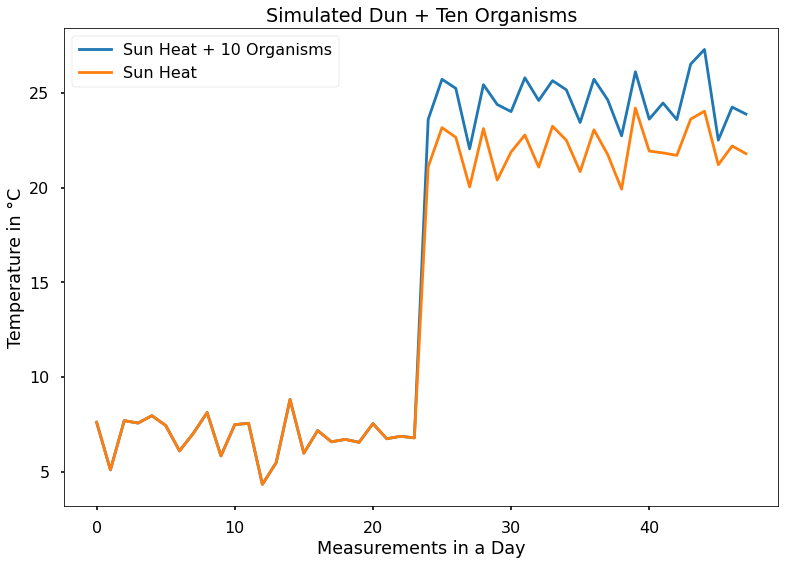

In [40]:
# We can use numpy sum over the second dimension and sum across all organisms
organisms_sum2 = np.sum(organisms_group, axis=1)

# as it happened before the output will be a (48,) tuple. 
# This is incompatible with our other vector `average_meas`
# This time, let's try using reshape to fix this
organisms_sum2 = organisms_sum2.reshape(-1,1)

# Finally we can sume all contributions to heating
sun_plus_organisms = average_means + organisms_sum + organisms_sum2

plt.figure().clear
plt.plot(sun_plus_organisms, label = "Sun Heat + 10 Organisms")
plt.plot(average_means, label = "Sun Heat")
plt.title('Simulated Dun + Ten Organisms')
plt.xlabel('Measurements in a Day')
plt.ylabel('Temperature in °C')
plt.legend()